In [14]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [15]:
df = DataFrame()
df['t'] = [x for x in range(10)]
print(df)

   t
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9


   t  t-1
0  0  NaN
1  1  0.0
2  2  1.0
3  3  2.0
4  4  3.0
5  5  4.0
6  6  5.0
7  7  6.0
8  8  7.0
9  9  8.0


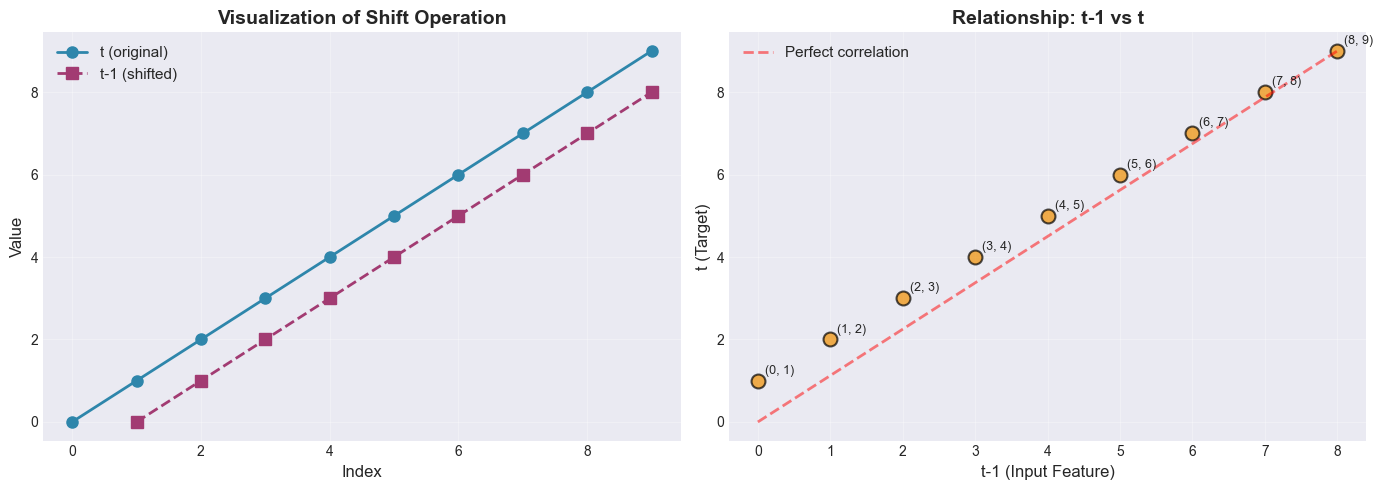

In [16]:
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-1'] = df['t'].shift(1)
print(df)

# Visualize the shift operation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Original series and shifted series
axes[0].plot(df.index, df['t'], marker='o', linewidth=2, markersize=8, label='t (original)', color='#2E86AB')
axes[0].plot(df.index, df['t-1'], marker='s', linewidth=2, markersize=8, label='t-1 (shifted)', color='#A23B72', linestyle='--')
axes[0].set_xlabel('Index', fontsize=12)
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('Visualization of Shift Operation', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Show the relationship
axes[1].scatter(df['t-1'], df['t'], s=100, alpha=0.7, color='#F18F01', edgecolors='black', linewidth=1.5)
axes[1].plot([df['t-1'].min(), df['t-1'].max()], 
             [df['t'].min(), df['t'].max()], 
             'r--', alpha=0.5, linewidth=2, label='Perfect correlation')
axes[1].set_xlabel('t-1 (Input Feature)', fontsize=12)
axes[1].set_ylabel('t (Target)', fontsize=12)
axes[1].set_title('Relationship: t-1 vs t', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Add annotations
for i in range(len(df)):
    if not pd.isna(df['t-1'].iloc[i]):
        axes[1].annotate(f'({int(df["t-1"].iloc[i])}, {int(df["t"].iloc[i])})', 
                        (df['t-1'].iloc[i], df['t'].iloc[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

One-Step Univariate Forecasting

In [17]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg  

   var1(t-2)  var1(t-1)  var1(t)  var1(t+1)
2        0.0        1.0        2        3.0
3        1.0        2.0        3        4.0
4        2.0        3.0        4        5.0
5        3.0        4.0        5        6.0
6        4.0        5.0        6        7.0
7        5.0        6.0        7        8.0
8        6.0        7.0        8        9.0


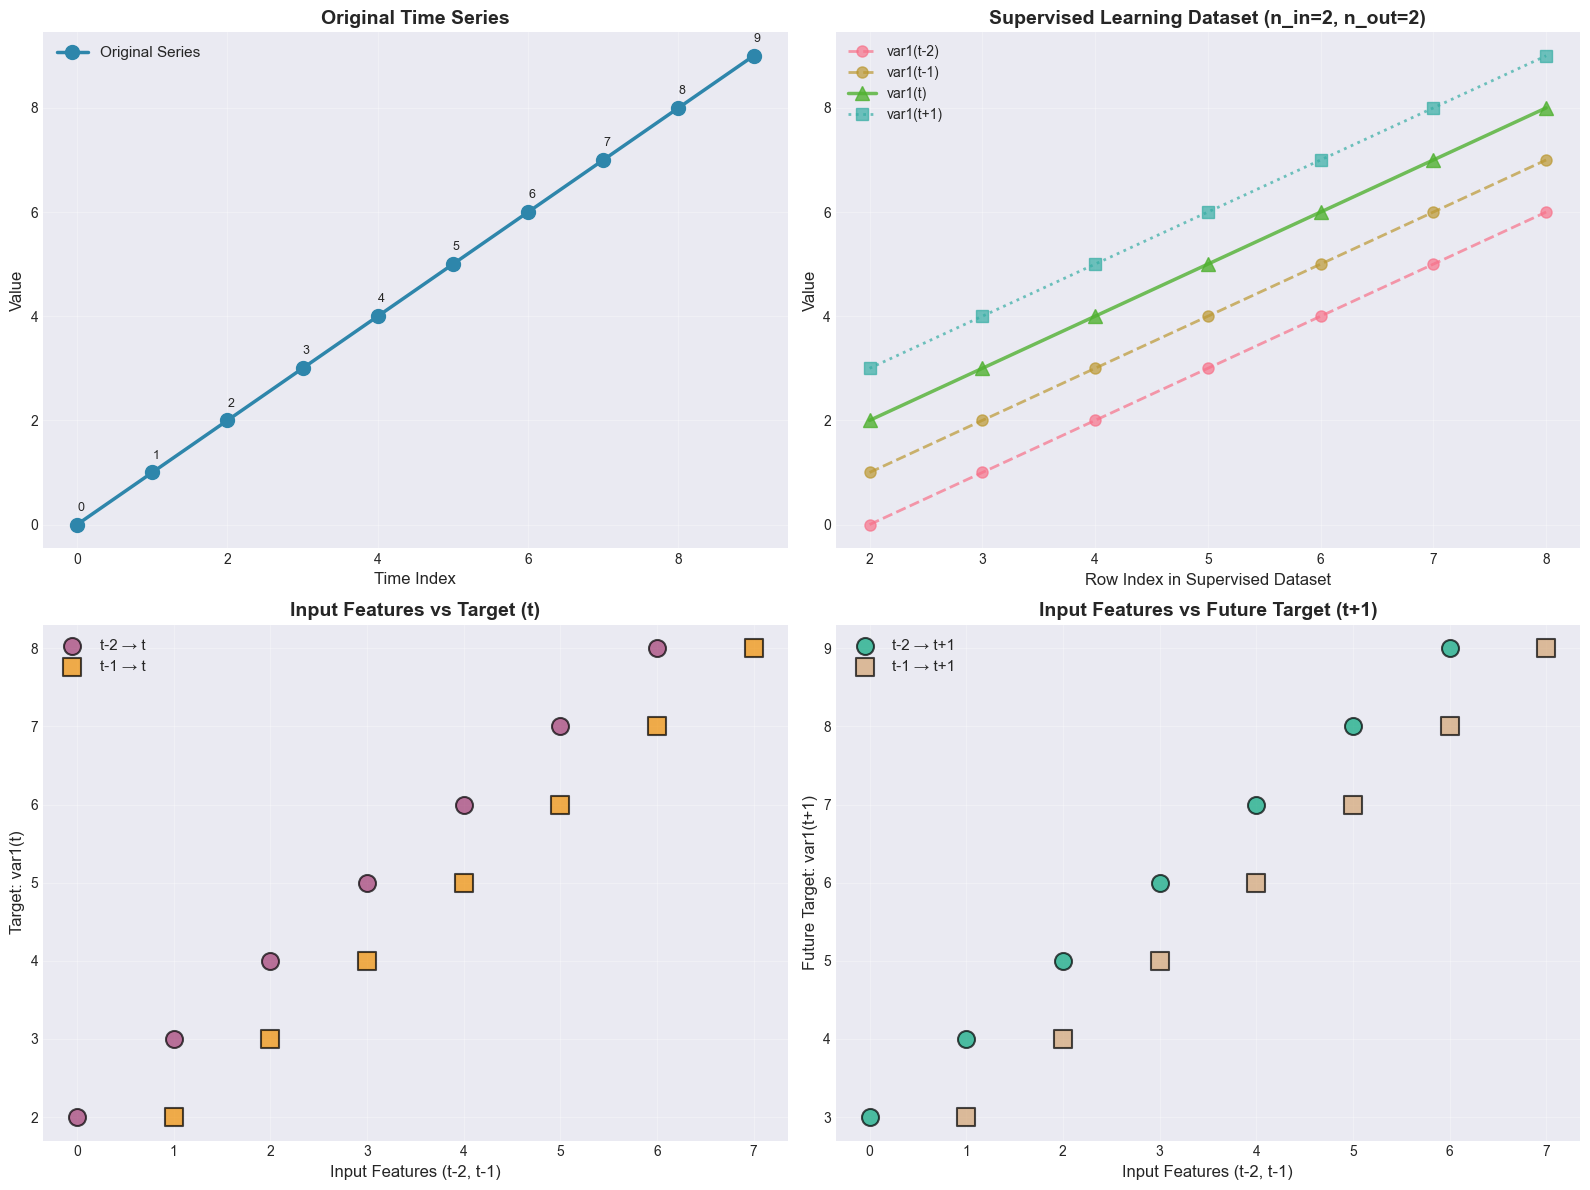


EXPLANATION:
• Input Features (X): var1(t-2), var1(t-1) - past values
• Target (y): var1(t) - current value, var1(t+1) - future value
• Each row represents one training example
• Model learns: [t-2, t-1] → [t, t+1]


In [18]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
values = [x for x in range(10)]
data = series_to_supervised(values, 2, 2)
print(data)

# Visualize the supervised learning transformation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Original time series
axes[0, 0].plot(range(len(values)), values, marker='o', linewidth=2.5, markersize=10, 
                color='#2E86AB', label='Original Series')
axes[0, 0].set_xlabel('Time Index', fontsize=12)
axes[0, 0].set_ylabel('Value', fontsize=12)
axes[0, 0].set_title('Original Time Series', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(values):
    axes[0, 0].annotate(f'{v}', (i, v), xytext=(0, 10), textcoords='offset points', fontsize=9)

# Plot 2: All features and targets overlaid
for col in data.columns:
    if 't-' in col:
        axes[0, 1].plot(data.index, data[col], marker='o', linewidth=2, markersize=8, 
                       label=col, linestyle='--', alpha=0.7)
    elif 't+' in col:
        axes[0, 1].plot(data.index, data[col], marker='s', linewidth=2, markersize=8, 
                       label=col, linestyle=':', alpha=0.7)
    else:
        axes[0, 1].plot(data.index, data[col], marker='^', linewidth=2.5, markersize=10, 
                       label=col, alpha=0.8)
axes[0, 1].set_xlabel('Row Index in Supervised Dataset', fontsize=12)
axes[0, 1].set_ylabel('Value', fontsize=12)
axes[0, 1].set_title('Supervised Learning Dataset (n_in=2, n_out=2)', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10, loc='best')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Input features vs Target (t)
axes[1, 0].scatter(data['var1(t-2)'], data['var1(t)'], s=150, alpha=0.7, 
                  color='#A23B72', edgecolors='black', linewidth=1.5, label='t-2 → t')
axes[1, 0].scatter(data['var1(t-1)'], data['var1(t)'], s=150, alpha=0.7, 
                  color='#F18F01', edgecolors='black', linewidth=1.5, marker='s', label='t-1 → t')
axes[1, 0].set_xlabel('Input Features (t-2, t-1)', fontsize=12)
axes[1, 0].set_ylabel('Target: var1(t)', fontsize=12)
axes[1, 0].set_title('Input Features vs Target (t)', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Input features vs Future Target (t+1)
axes[1, 1].scatter(data['var1(t-2)'], data['var1(t+1)'], s=150, alpha=0.7, 
                  color='#06A77D', edgecolors='black', linewidth=1.5, label='t-2 → t+1')
axes[1, 1].scatter(data['var1(t-1)'], data['var1(t+1)'], s=150, alpha=0.7, 
                  color='#D4A574', edgecolors='black', linewidth=1.5, marker='s', label='t-1 → t+1')
axes[1, 1].set_xlabel('Input Features (t-2, t-1)', fontsize=12)
axes[1, 1].set_ylabel('Future Target: var1(t+1)', fontsize=12)
axes[1, 1].set_title('Input Features vs Future Target (t+1)', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print explanation
print("\n" + "="*70)
print("EXPLANATION:")
print("="*70)
print("• Input Features (X): var1(t-2), var1(t-1) - past values")
print("• Target (y): var1(t) - current value, var1(t+1) - future value")
print("• Each row represents one training example")
print("• Model learns: [t-2, t-1] → [t, t+1]")
print("="*70)

In [19]:

data = series_to_supervised(values, 3)

   var1(t-3)  var1(t-2)  var1(t-1)  var1(t)
3        0.0        1.0        2.0        3
4        1.0        2.0        3.0        4
5        2.0        3.0        4.0        5
6        3.0        4.0        5.0        6
7        4.0        5.0        6.0        7
8        5.0        6.0        7.0        8
9        6.0        7.0        8.0        9


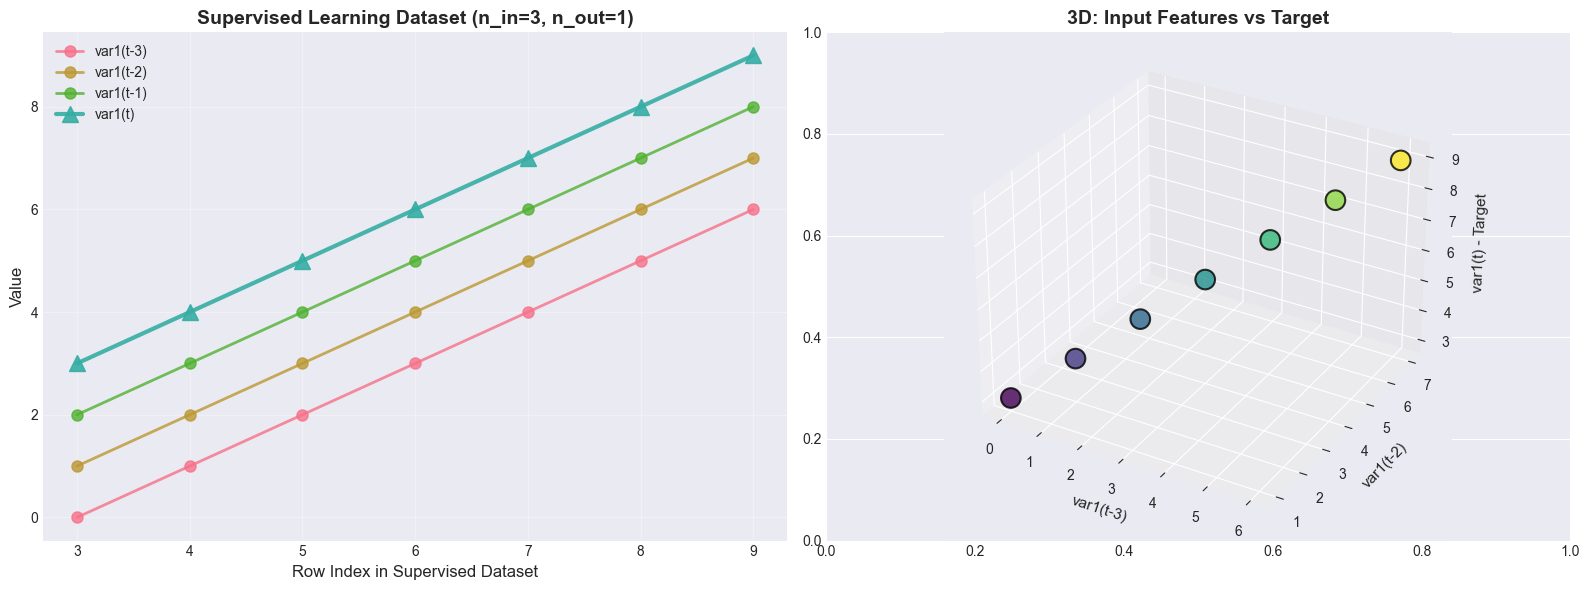


With n_in=3, we use 3 past values to predict the current value
Input: [t-3, t-2, t-1] → Output: [t]


In [20]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
values = [x for x in range(10)]
data = series_to_supervised(values, 3)
print(data)

# Visualize with 3 lag features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Show all lagged features
for col in data.columns:
    if 't-' in col:
        axes[0].plot(data.index, data[col], marker='o', linewidth=2, markersize=8, 
                    label=col, alpha=0.8)
    else:
        axes[0].plot(data.index, data[col], marker='^', linewidth=3, markersize=12, 
                    label=col, alpha=0.9)
axes[0].set_xlabel('Row Index in Supervised Dataset', fontsize=12)
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('Supervised Learning Dataset (n_in=3, n_out=1)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10, loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: 3D visualization of input features vs target
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(122, projection='3d')
ax.scatter(data['var1(t-3)'], data['var1(t-2)'], data['var1(t)'], 
          s=200, alpha=0.8, c=data['var1(t)'], cmap='viridis', edgecolors='black', linewidth=1.5)
ax.set_xlabel('var1(t-3)', fontsize=11)
ax.set_ylabel('var1(t-2)', fontsize=11)
ax.set_zlabel('var1(t) - Target', fontsize=11)
ax.set_title('3D: Input Features vs Target', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("With n_in=3, we use 3 past values to predict the current value")
print("Input: [t-3, t-2, t-1] → Output: [t]")
print("="*70)

Multivariate Forecasting

   var1(t-1)  var2(t-1)  var1(t)  var2(t)
1        0.0       50.0        1       51
2        1.0       51.0        2       52
3        2.0       52.0        3       53
4        3.0       53.0        4       54
5        4.0       54.0        5       55
6        5.0       55.0        6       56
7        6.0       56.0        7       57
8        7.0       57.0        8       58
9        8.0       58.0        9       59


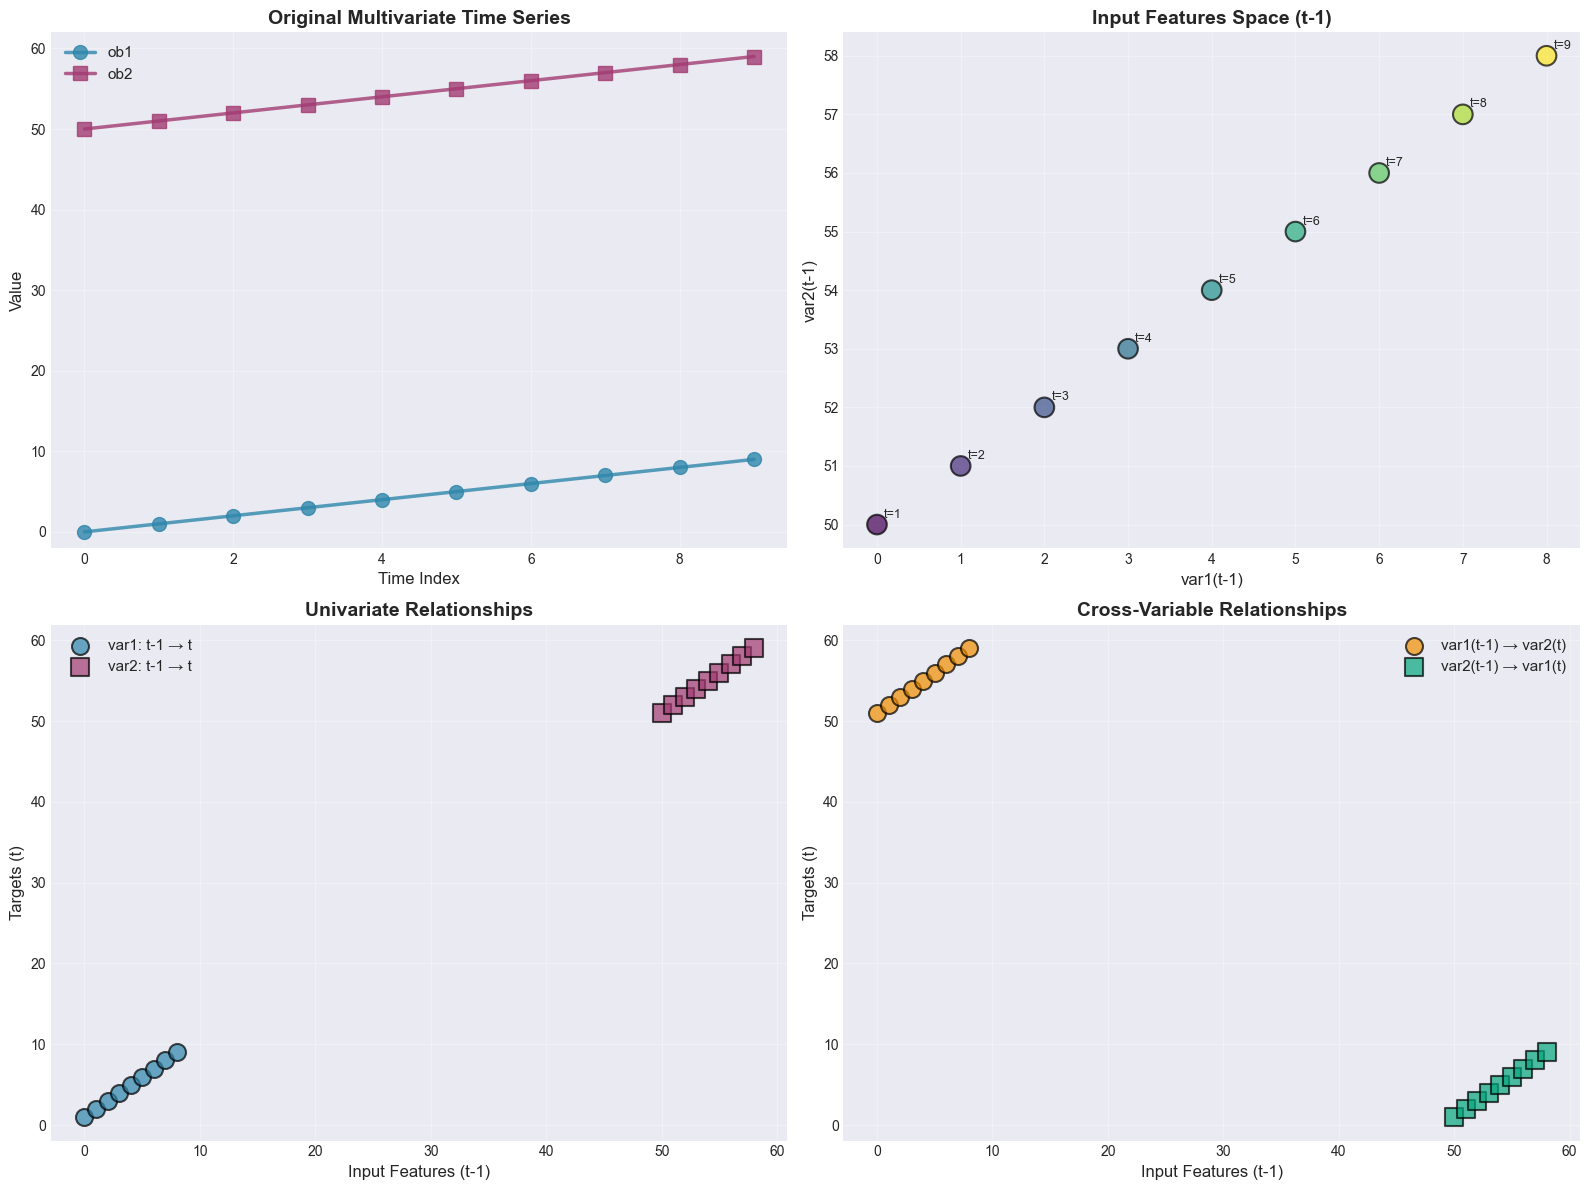


MULTIVARIATE FORECASTING:
• Input Features: var1(t-1), var2(t-1) - past values of both variables
• Targets: var1(t), var2(t) - current values of both variables
• Model can learn relationships within and across variables


In [21]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data = series_to_supervised(values)
print(data)

# Visualize multivariate supervised learning
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Original multivariate time series
axes[0, 0].plot(range(len(raw)), raw['ob1'], marker='o', linewidth=2.5, markersize=10, 
               color='#2E86AB', label='ob1', alpha=0.8)
axes[0, 0].plot(range(len(raw)), raw['ob2'], marker='s', linewidth=2.5, markersize=10, 
               color='#A23B72', label='ob2', alpha=0.8)
axes[0, 0].set_xlabel('Time Index', fontsize=12)
axes[0, 0].set_ylabel('Value', fontsize=12)
axes[0, 0].set_title('Original Multivariate Time Series', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim([-2, 62])

# Plot 2: Input features (t-1) for both variables
axes[0, 1].scatter(data['var1(t-1)'], data['var2(t-1)'], s=200, alpha=0.7, 
                  c=range(len(data)), cmap='viridis', edgecolors='black', linewidth=1.5)
for i in range(len(data)):
    axes[0, 1].annotate(f't={data.index[i]}', 
                       (data['var1(t-1)'].iloc[i], data['var2(t-1)'].iloc[i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[0, 1].set_xlabel('var1(t-1)', fontsize=12)
axes[0, 1].set_ylabel('var2(t-1)', fontsize=12)
axes[0, 1].set_title('Input Features Space (t-1)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Relationship var1(t-1) → var1(t) and var2(t-1) → var2(t)
axes[1, 0].scatter(data['var1(t-1)'], data['var1(t)'], s=150, alpha=0.7, 
                  color='#2E86AB', edgecolors='black', linewidth=1.5, label='var1: t-1 → t')
axes[1, 0].scatter(data['var2(t-1)'], data['var2(t)'], s=150, alpha=0.7, 
                  color='#A23B72', edgecolors='black', linewidth=1.5, marker='s', label='var2: t-1 → t')
axes[1, 0].set_xlabel('Input Features (t-1)', fontsize=12)
axes[1, 0].set_ylabel('Targets (t)', fontsize=12)
axes[1, 0].set_title('Univariate Relationships', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Cross-variable relationships
axes[1, 1].scatter(data['var1(t-1)'], data['var2(t)'], s=150, alpha=0.7, 
                  color='#F18F01', edgecolors='black', linewidth=1.5, label='var1(t-1) → var2(t)')
axes[1, 1].scatter(data['var2(t-1)'], data['var1(t)'], s=150, alpha=0.7, 
                  color='#06A77D', edgecolors='black', linewidth=1.5, marker='s', label='var2(t-1) → var1(t)')
axes[1, 1].set_xlabel('Input Features (t-1)', fontsize=12)
axes[1, 1].set_ylabel('Targets (t)', fontsize=12)
axes[1, 1].set_title('Cross-Variable Relationships', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MULTIVARIATE FORECASTING:")
print("="*70)
print("• Input Features: var1(t-1), var2(t-1) - past values of both variables")
print("• Targets: var1(t), var2(t) - current values of both variables")
print("• Model can learn relationships within and across variables")
print("="*70)

   var1(t-1)  var2(t-1)  var1(t)  var2(t)  var1(t+1)  var2(t+1)
1        0.0       50.0        1       51        2.0       52.0
2        1.0       51.0        2       52        3.0       53.0
3        2.0       52.0        3       53        4.0       54.0
4        3.0       53.0        4       54        5.0       55.0
5        4.0       54.0        5       55        6.0       56.0
6        5.0       55.0        6       56        7.0       57.0
7        6.0       56.0        7       57        8.0       58.0
8        7.0       57.0        8       58        9.0       59.0


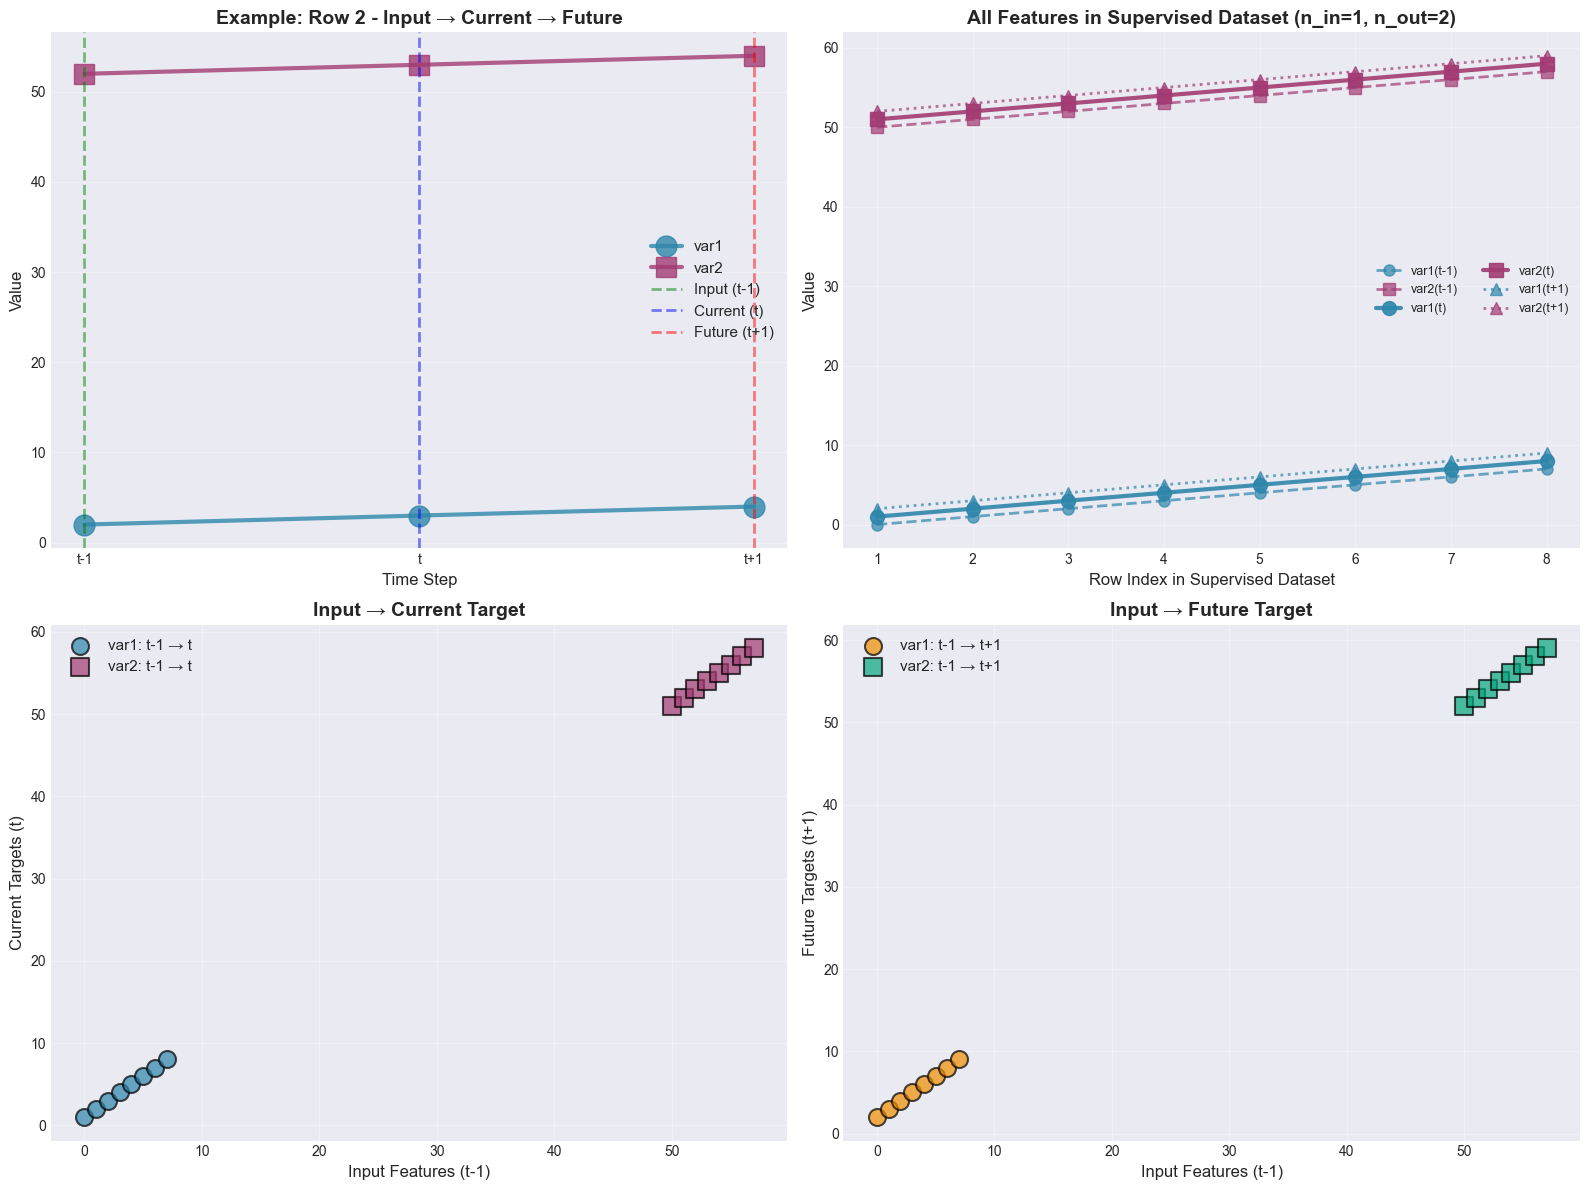


MULTIVARIATE MULTI-STEP FORECASTING:
• Input: [var1(t-1), var2(t-1)]
• Output: [var1(t), var2(t), var1(t+1), var2(t+1)]
• Predicts both current (t) and future (t+1) values
• Useful for multi-step ahead forecasting


In [22]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
values = raw.values
data = series_to_supervised(values, 1, 2)
print(data)

# Visualize multivariate with multiple output steps
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Timeline showing input, current, and future values
row_idx = 2  # Show example for row index 2
example_row = data.iloc[row_idx]
axes[0, 0].plot([-1, 0, 1], 
                [example_row['var1(t-1)'], example_row['var1(t)'], example_row['var1(t+1)']],
                marker='o', linewidth=3, markersize=15, color='#2E86AB', label='var1', alpha=0.8)
axes[0, 0].plot([-1, 0, 1], 
                [example_row['var2(t-1)'], example_row['var2(t)'], example_row['var2(t+1)']],
                marker='s', linewidth=3, markersize=15, color='#A23B72', label='var2', alpha=0.8)
axes[0, 0].axvline(x=-1, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Input (t-1)')
axes[0, 0].axvline(x=0, color='blue', linestyle='--', linewidth=2, alpha=0.5, label='Current (t)')
axes[0, 0].axvline(x=1, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Future (t+1)')
axes[0, 0].set_xlabel('Time Step', fontsize=12)
axes[0, 0].set_ylabel('Value', fontsize=12)
axes[0, 0].set_title(f'Example: Row {row_idx} - Input → Current → Future', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks([-1, 0, 1])
axes[0, 0].set_xticklabels(['t-1', 't', 't+1'])
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: All features over time in supervised dataset
for col in data.columns:
    if 'var1' in col:
        if 't-' in col:
            axes[0, 1].plot(data.index, data[col], marker='o', linewidth=2, markersize=8, 
                           label=col, linestyle='--', alpha=0.7, color='#2E86AB')
        elif 't+' in col:
            axes[0, 1].plot(data.index, data[col], marker='^', linewidth=2, markersize=8, 
                           label=col, linestyle=':', alpha=0.7, color='#2E86AB')
        else:
            axes[0, 1].plot(data.index, data[col], marker='o', linewidth=3, markersize=10, 
                           label=col, alpha=0.9, color='#2E86AB')
    else:  # var2
        if 't-' in col:
            axes[0, 1].plot(data.index, data[col], marker='s', linewidth=2, markersize=8, 
                           label=col, linestyle='--', alpha=0.7, color='#A23B72')
        elif 't+' in col:
            axes[0, 1].plot(data.index, data[col], marker='^', linewidth=2, markersize=8, 
                           label=col, linestyle=':', alpha=0.7, color='#A23B72')
        else:
            axes[0, 1].plot(data.index, data[col], marker='s', linewidth=3, markersize=10, 
                           label=col, alpha=0.9, color='#A23B72')
axes[0, 1].set_xlabel('Row Index in Supervised Dataset', fontsize=12)
axes[0, 1].set_ylabel('Value', fontsize=12)
axes[0, 1].set_title('All Features in Supervised Dataset (n_in=1, n_out=2)', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=9, loc='best', ncol=2)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Input → Current target (t)
axes[1, 0].scatter(data['var1(t-1)'], data['var1(t)'], s=150, alpha=0.7, 
                  color='#2E86AB', edgecolors='black', linewidth=1.5, label='var1: t-1 → t')
axes[1, 0].scatter(data['var2(t-1)'], data['var2(t)'], s=150, alpha=0.7, 
                  color='#A23B72', edgecolors='black', linewidth=1.5, marker='s', label='var2: t-1 → t')
axes[1, 0].set_xlabel('Input Features (t-1)', fontsize=12)
axes[1, 0].set_ylabel('Current Targets (t)', fontsize=12)
axes[1, 0].set_title('Input → Current Target', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Input → Future target (t+1)
axes[1, 1].scatter(data['var1(t-1)'], data['var1(t+1)'], s=150, alpha=0.7, 
                  color='#F18F01', edgecolors='black', linewidth=1.5, label='var1: t-1 → t+1')
axes[1, 1].scatter(data['var2(t-1)'], data['var2(t+1)'], s=150, alpha=0.7, 
                  color='#06A77D', edgecolors='black', linewidth=1.5, marker='s', label='var2: t-1 → t+1')
axes[1, 1].set_xlabel('Input Features (t-1)', fontsize=12)
axes[1, 1].set_ylabel('Future Targets (t+1)', fontsize=12)
axes[1, 1].set_title('Input → Future Target', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MULTIVARIATE MULTI-STEP FORECASTING:")
print("="*70)
print("• Input: [var1(t-1), var2(t-1)]")
print("• Output: [var1(t), var2(t), var1(t+1), var2(t+1)]")
print("• Predicts both current (t) and future (t+1) values")
print("• Useful for multi-step ahead forecasting")
print("="*70)